In [2]:
import pandas as pd

# Scrape FTSE 100 constituents from Wikipedia
url = "https://en.wikipedia.org/wiki/FTSE_100_Index"
tables = pd.read_html(url)
ftse_table = tables[4]  # Constituents table (check index if it changes)
ftse_table = ftse_table.rename(columns={'FTSE industry classification benchmark sector[36]': 'Sector'})

#ftse_table.head()
# Keep relevant columns (Company, Ticker, Sector)
ftse_constituents = ftse_table[["Company", "Ticker", "Sector"]]
#ftse_constituents["Ticker"] = ftse_constituents["Ticker"] + ".L"  # Yahoo Finance uses .L for LSE

ftse_constituents.head()
ftse_constituents.to_csv('ftse_100_constituents.csv', index = False)

In [20]:
import yfinance as yf

# Define time period
start_date = "2020-01-01"
end_date = "2023-12-31"

# Download data for all constituents
ls = []
for ticker in ftse_constituents["Ticker"]:
    file_path = 'ftse_100_data/'
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(file_path+ticker+'.csv')
    data = yf.download(ticker+".L", start=start_date, end=end_date)
    data.to_csv(file_path+ticker+'.csv')
    

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANTO']: HTTPError('HTTP Error 404: ')
[*********************100%***********************]  1 of 1

# Load in the data into one time Series

In [21]:
import os
import pandas as pd

# Directory containing the CSV files
data_dir = 'ftse_100_data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Dictionary to hold closing prices
close_prices = {}

for file in csv_files:
    ticker = file.replace('.csv', '')
    df = pd.read_csv(os.path.join(data_dir, file))
    if 'Close' in df.columns:
        close_prices[ticker] = df['Close']

# Combine into a DataFrame (dates as index, tickers as columns)
close_df = pd.DataFrame(close_prices)

#close_df.dropna(inplace=True, axis = 1)  # Drop rows with any NaN values
close_df = close_df.T.iloc[:, 2:]
close_df

,2,3,4,5,6,7,8,9,10,11,...,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
AAF,78.75521850585938,78.45537567138672,78.40541076660156,79.25493621826172,77.70580291748047,77.55590057373047,75.60700988769531,74.9573745727539,74.80745697021484,72.95851135253906,...,120.5,121.80000305175781,125.0,127.5999984741211,129.8000030517578,127.69999694824219,129.5,129.8000030517578,129.39999389648438,130.1999969482422
KGF,220.73312377929688,218.53775024414062,219.136474609375,227.51876831054688,223.52719116210938,217.04090881347656,209.9558868408203,213.54827880859375,218.03883361816406,213.54827880859375,...,243.32533264160156,244.0248260498047,238.8285675048828,241.52664184570312,247.42239379882812,244.7243194580078,246.6229705810547,246.6229705810547,245.92347717285156,243.12548828125
DPLM,2040.2801513671875,2018.29833984375,2006.3087158203125,2004.310302734375,1988.3238525390625,1994.3187255859375,1928.374267578125,1906.392822265625,1899.398681640625,1845.4443359375,...,3534.942138671875,3560.934326171875,3520.9462890625,3550.9375,3594.92431640625,3602.921630859375,3578.928955078125,3606.920654296875,3586.926513671875,3580.928466796875
SN,1828.843017578125,1844.3201904296875,1809.37109375,1829.8414306640625,1829.8414306640625,1844.3201904296875,1863.29296875,1866.288330078125,1872.779296875,1887.2579345703125,...,1081.476806640625,1043.994873046875,1045.993896484375,1047.9930419921875,1064.9847412109375,1070.482177734375,1073.4805908203125,1070.9818115234375,1075.9794921875,1077.978515625
PSON,649.0309448242188,642.0413208007812,633.8534545898438,641.841552734375,634.45263671875,624.0681762695312,626.86376953125,624.667236328125,604.0980224609375,617.4779663085938,...,942.263427734375,937.8650512695312,940.2640991210938,948.2612915039062,950.4605102539062,956.0585327148438,963.2559204101562,958.8574829101562,964.4555053710938,963.8557739257812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTB,4202.48828125,4175.8798828125,4121.80322265625,4115.794921875,4066.010498046875,4052.277099609375,3990.4755859375,4042.835205078125,4102.0615234375,4151.84521484375,...,3492.541748046875,3479.547119140625,3533.5244140625,3599.4970703125,3636.4814453125,3631.48388671875,3632.4833984375,3625.486328125,3618.4892578125,3654.47412109375
SVT,2509.2177734375,2510.2158203125,2492.257080078125,2468.312255859375,2465.31884765625,2476.2939453125,2453.346923828125,2512.2109375,2515.2041015625,2540.146728515625,...,2648.041015625,2617.064208984375,2598.078125,2639.0478515625,2670.02490234375,2627.056640625,2617.064208984375,2607.071533203125,2591.08349609375,2577.09375
BAB,630.9102783203125,612.9129028320312,628.3107299804688,646.5081787109375,640.9088745117188,643.108642578125,635.9096069335938,638.309326171875,632.5100708007812,618.7120971679688,...,397.5602722167969,384.9615478515625,393.9606018066406,396.7603454589844,400.3599548339844,394.96051025390625,396.56036376953125,398.36016845703125,397.1603088378906,394.96051025390625
IMI,1192.6810302734375,1180.1949462890625,1178.696533203125,1165.711181640625,1154.2235107421875,1166.2103271484375,1161.7152099609375,1171.7042236328125,1176.1993408203125,1170.205810546875,...,1667.542724609375,1640.55029296875,1628.553466796875,1651.5472412109375,1699.5340576171875,1699.5340576171875,1708.5316162109375,1689.5367431640625,1684.5382080078125,1683.5384521484375


In [22]:
close_df = close_df.apply(pd.to_numeric, errors='coerce').astype('float64')

In [23]:
close_df = close_df.pct_change(axis= 1).iloc[:, 1:]#.to_csv('ftse_100_returns.csv', index=True)

/tmp/ipykernel_1200585/4122405138.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  close_df = close_df.pct_change(axis= 1).iloc[:, 1:]#.to_csv('ftse_100_returns.csv', index=True)


In [24]:
close_df

,3,4,5,6,7,8,9,10,11,12,...,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
AAF,-0.003807,-0.000637,0.010835,-0.019546,-0.001929,-0.025129,-0.008592,-0.002000,-0.024716,-0.056849,...,0.045100,0.010788,0.026273,0.020800,0.017241,-0.016179,0.014096,0.002317,-0.003082,0.006182
KGF,-0.009946,0.002740,0.038251,-0.017544,-0.029018,-0.032644,0.017110,0.021028,-0.020595,-0.019159,...,0.068920,0.002875,-0.021294,0.011297,0.024410,-0.010905,0.007758,0.000000,-0.002836,-0.011377
DPLM,-0.010774,-0.005940,-0.000996,-0.007976,0.003015,-0.033066,-0.011399,-0.003669,-0.028406,0.028695,...,0.020196,0.007353,-0.011230,0.008518,0.012387,0.002225,-0.006659,0.007821,-0.005543,-0.001672
SN,0.008463,-0.018950,0.011314,0.000000,0.007913,0.010287,0.001608,0.003478,0.007731,-0.008466,...,0.024621,-0.034658,0.001915,0.001911,0.016214,0.005162,0.002801,-0.002328,0.004666,0.001858
PSON,-0.010769,-0.012753,0.012602,-0.011512,-0.016368,0.004480,-0.003504,-0.032928,0.022149,-0.088939,...,-0.014017,-0.004668,0.002558,0.008505,0.002319,0.005890,0.007528,-0.004566,0.005838,-0.000622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTB,-0.006332,-0.012950,-0.001458,-0.012096,-0.003378,-0.015251,0.013121,0.014650,0.012136,-0.051685,...,0.041120,-0.003721,0.015513,0.018670,0.010275,-0.001374,0.000275,-0.001926,-0.001930,0.009945
SVT,0.000398,-0.007154,-0.009608,-0.001213,0.004452,-0.009267,0.023993,0.001191,0.009917,0.007070,...,-0.018882,-0.011698,-0.007255,0.015769,0.011738,-0.016093,-0.003804,-0.003818,-0.006133,-0.005399
BAB,-0.028526,0.025122,0.028962,-0.008661,0.003432,-0.011194,0.003774,-0.009085,-0.021815,-0.014544,...,0.022634,-0.031690,0.023377,0.007107,0.009073,-0.013486,0.004051,0.004539,-0.003012,-0.005539
IMI,-0.010469,-0.001270,-0.011017,-0.009855,0.010385,-0.003854,0.008599,0.003836,-0.005096,0.005975,...,0.018937,-0.016187,-0.007313,0.014119,0.029056,0.000000,0.005294,-0.011118,-0.002959,-0.000593


In [25]:
close_df.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_close_prices.csv', index=True)

In [4]:
# Get the sectors data that correlates with the tickers
close_df = pd.read_csv("/yunity/arusty/PF-GAP/data/ftse_100_close_prices.csv", index_col=0)

ftse_constituents = pd.read_csv('ftse_100_constituents.csv')
ftse_constituents = ftse_constituents.set_index('Ticker')
ftse_constituents = ftse_constituents.loc[close_df.index]
ftse_constituents

,Company,Sector
AAF,Airtel Africa,Telecommunications services
KGF,Kingfisher plc,Retailers
DPLM,Diploma,Industrial Support services
SN,Smith & Nephew,Health care equipment & supplies
PSON,Pearson plc,Media
...,...,...
WTB,Whitbread,Retail hospitality
SVT,Severn Trent,Multiline utilities
BAB,Babcock International,Aerospace & defence
IMI,IMI,"Machinery, tools, heavy vehicles, trains & ships"


In [7]:
labels = ftse_constituents["Sector"]
labels

AAF                          Telecommunications services
KGF                                            Retailers
DPLM                         Industrial Support services
SN                      Health care equipment & supplies
PSON                                               Media
                              ...                       
WTB                                   Retail hospitality
SVT                                  Multiline utilities
BAB                                  Aerospace & defence
IMI     Machinery, tools, heavy vehicles, trains & ships
IMB                                              Tobacco
Name: Sector, Length: 100, dtype: object

In [28]:
labels.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_sectors.csv', index=False)

<Axes: xlabel='Sector'>

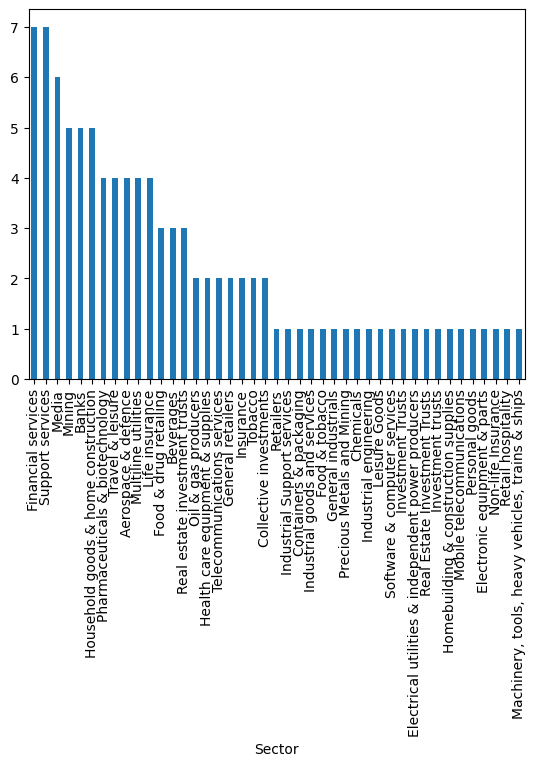

In [6]:
labels.value_counts().plot(kind='bar')

# Sector Grouping Analysis

Let's analyze the current sectors and create intelligent groupings for better classification.

In [34]:
# Display current sectors and their frequencies
print("Current FTSE 100 Sectors and their frequencies:")
print("=" * 50)
sector_counts = labels.value_counts()
for sector, count in sector_counts.items():
    print(f"{sector}: {count}")
    
print(f"\nTotal unique sectors: {len(sector_counts)}")
print(f"Total companies: {len(labels)}")

Current FTSE 100 Sectors and their frequencies:
Financial services: 7
Support services: 7
Media: 6
Mining: 5
Banks: 5
Household goods & home construction: 5
Pharmaceuticals & biotechnology: 4
Travel & leisure: 4
Aerospace & defence: 4
Multiline utilities: 4
Life insurance: 4
Food & drug retailing: 3
Beverages: 3
Real estate investment trusts: 3
Oil & gas producers: 2
Health care equipment & supplies: 2
Telecommunications services: 2
General retailers: 2
Insurance: 2
Tobacco: 2
Collective investments: 2
Retailers: 1
Industrial Support services: 1
Containers & packaging: 1
Industrial goods and services: 1
Food & tobacco: 1
General industrials: 1
Precious Metals and Mining: 1
Chemicals: 1
Industrial engineering: 1
Leisure Goods: 1
Software & computer services: 1
Investment Trusts: 1
Electrical utilities & independent power producers: 1
Real Estate Investment Trusts: 1
Investment trusts: 1
Homebuilding & construction supplies: 1
Mobile telecommunications: 1
Personal goods: 1
Electronic equ

In [35]:
# Create intelligent sector groupings
# Based on common business categories and economic functions

sector_groupings = {
    # Financial Services
    'Financial Services': [
        'Banks', 'Life Insurance', 'Nonlife Insurance', 'Real Estate Investment Trusts', 
        'Financial Services', 'Investment Banking & Brokerage Services'
    ],
    
    # Technology & Communications
    'Technology & Communications': [
        'Software & Computer Services', 'Technology Hardware & Equipment',
        'Fixed Line Telecommunications', 'Mobile Telecommunications'
    ],
    
    # Healthcare & Life Sciences
    'Healthcare & Life Sciences': [
        'Pharmaceuticals & Biotechnology', 'Medical Equipment & Services',
        'Health Care Equipment & Services'
    ],
    
    # Consumer Goods & Services
    'Consumer Goods & Services': [
        'Food & Drug Retailers', 'General Retailers', 'Media', 'Travel & Leisure',
        'Personal Care, Drug & Grocery Stores', 'Beverages', 'Food Producers',
        'Household Goods & Home Construction', 'Automobiles & Parts',
        'Leisure Goods', 'Tobacco'
    ],
    
    # Energy & Utilities
    'Energy & Utilities': [
        'Oil & Gas Producers', 'Oil Equipment & Services', 'Gas, Water & Multi-utilities',
        'Electricity', 'Alternative Energy'
    ],
    
    # Industrials & Materials
    'Industrials & Materials': [
        'Mining', 'Industrial Engineering', 'Construction & Materials',
        'Support Services', 'Aerospace & Defense', 'General Industrials',
        'Industrial Transportation', 'Electronic & Electrical Equipment',
        'Chemicals', 'Steel & Other Metals', 'Forestry & Paper'
    ]
}

# Create reverse mapping for easy lookup
sector_to_group = {}
for group, sectors in sector_groupings.items():
    for sector in sectors:
        sector_to_group[sector] = group

print("Sector Groupings:")
print("=" * 50)
for group, sectors in sector_groupings.items():
    print(f"\n{group}:")
    for sector in sectors:
        print(f"  - {sector}")
        
print(f"\nTotal groups: {len(sector_groupings)}")

Sector Groupings:

Financial Services:
  - Banks
  - Life Insurance
  - Nonlife Insurance
  - Real Estate Investment Trusts
  - Financial Services
  - Investment Banking & Brokerage Services

Technology & Communications:
  - Software & Computer Services
  - Technology Hardware & Equipment
  - Fixed Line Telecommunications
  - Mobile Telecommunications

Healthcare & Life Sciences:
  - Pharmaceuticals & Biotechnology
  - Medical Equipment & Services
  - Health Care Equipment & Services

Consumer Goods & Services:
  - Food & Drug Retailers
  - General Retailers
  - Media
  - Travel & Leisure
  - Personal Care, Drug & Grocery Stores
  - Beverages
  - Food Producers
  - Household Goods & Home Construction
  - Automobiles & Parts
  - Leisure Goods
  - Tobacco

Energy & Utilities:
  - Oil & Gas Producers
  - Oil Equipment & Services
  - Gas, Water & Multi-utilities
  - Electricity
  - Alternative Energy

Industrials & Materials:
  - Mining
  - Industrial Engineering
  - Construction & Materia

In [36]:
# Apply groupings to the labels
grouped_labels = labels.map(sector_to_group)

# Check for any unmapped sectors
unmapped_sectors = set(labels.unique()) - set(sector_to_group.keys())
if unmapped_sectors:
    print("Warning: The following sectors were not mapped to any group:")
    for sector in unmapped_sectors:
        print(f"  - {sector}")
    print("\nYou may need to add these to the sector_groupings dictionary.")
else:
    print("All sectors have been successfully mapped to groups!")

print("\nGrouped Labels Distribution:")
print("=" * 40)
group_counts = grouped_labels.value_counts()
for group, count in group_counts.items():
    print(f"{group}: {count} companies")

print(f"\nTotal companies: {len(grouped_labels)}")
print(f"Groups: {len(group_counts)}")

  - Industrial Support services
  - Oil & gas producers
  - General industrials
  - Software & computer services
  - Electronic equipment & parts
  - Non-life Insurance
  - Retailers
  - Insurance
  - Homebuilding & construction supplies
  - Financial services
  - Multiline utilities
  - Travel & leisure
  - Investment trusts
  - Industrial goods and services
  - Electrical utilities & independent power producers
  - General retailers
  - Investment Trusts
  - Telecommunications services
  - Machinery, tools, heavy vehicles, trains & ships
  - Retail hospitality
  - Food & tobacco
  - Life insurance
  - Industrial engineering
  - Mobile telecommunications
  - Personal goods
  - Pharmaceuticals & biotechnology
  - Support services
  - Health care equipment & supplies
  - Household goods & home construction
  - Food & drug retailing
  - Collective investments
  - Precious Metals and Mining
  - Aerospace & defence
  - Real estate investment trusts
  - Containers & packaging

You may need 

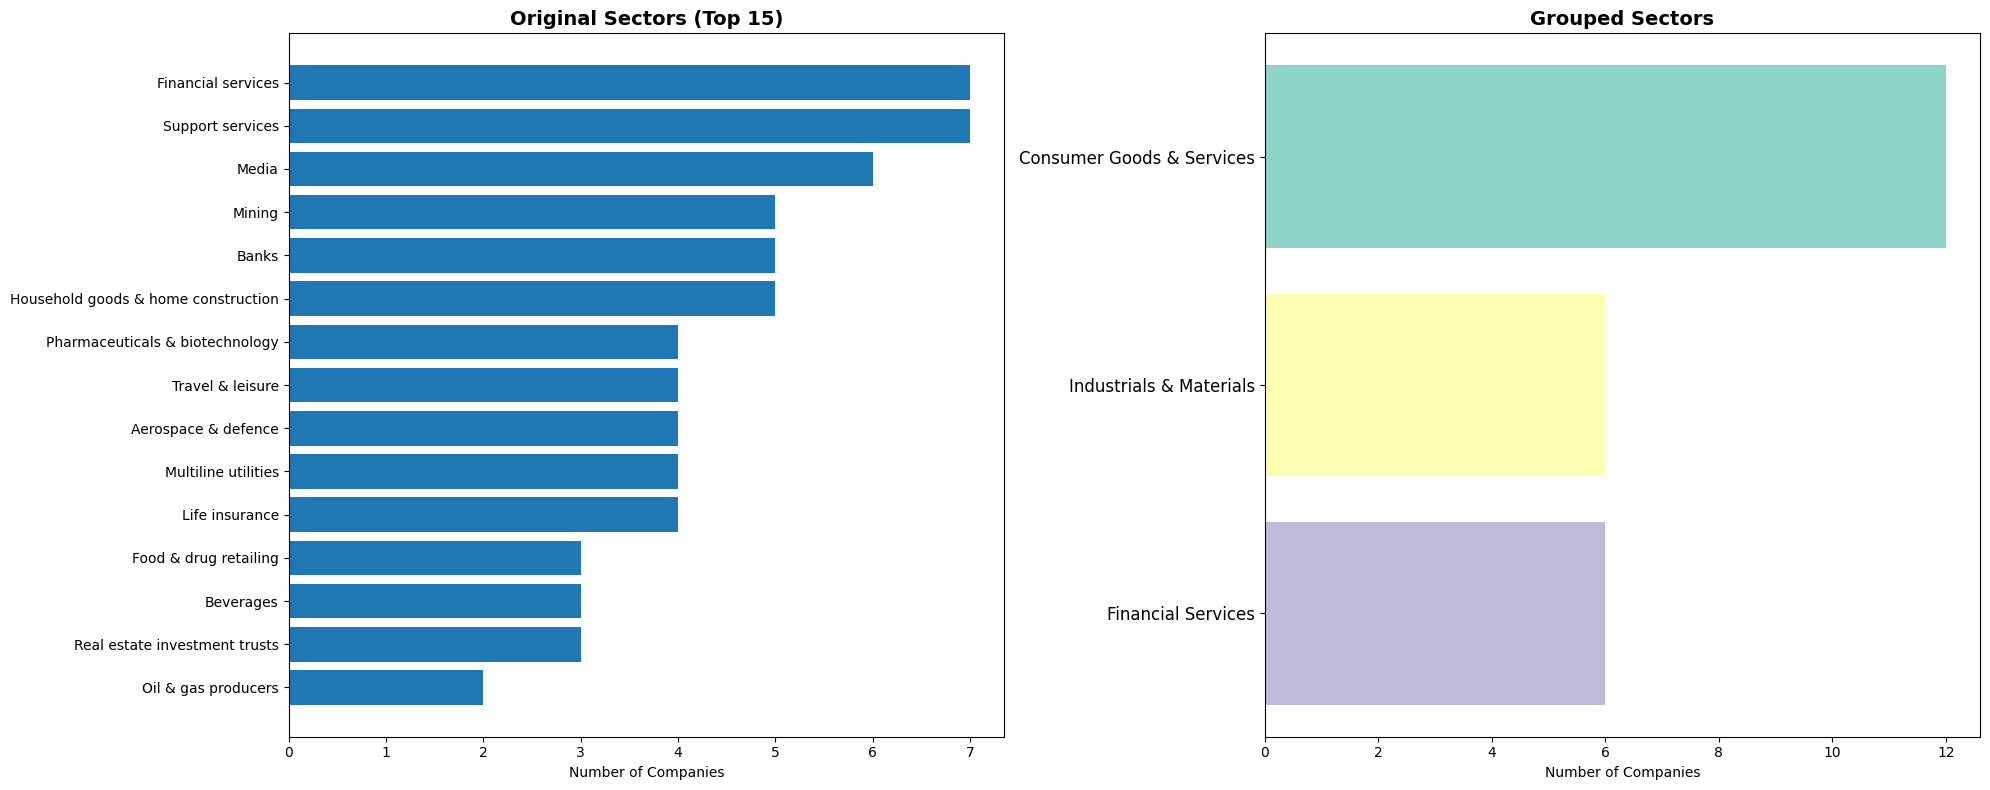

Sector Reduction Summary:
Original sectors: 43
Grouped sectors: 3
Reduction: 40 sectors
Reduction percentage: 93.0%


In [37]:
import matplotlib.pyplot as plt

# Create side-by-side comparison of original vs grouped sectors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original sectors (top 15 for readability)
original_counts = labels.value_counts().head(15)
ax1.barh(range(len(original_counts)), original_counts.values)
ax1.set_yticks(range(len(original_counts)))
ax1.set_yticklabels(original_counts.index, fontsize=10)
ax1.set_xlabel('Number of Companies')
ax1.set_title('Original Sectors (Top 15)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Grouped sectors
group_counts = grouped_labels.value_counts()
colors = plt.cm.Set3(range(len(group_counts)))
ax2.barh(range(len(group_counts)), group_counts.values, color=colors)
ax2.set_yticks(range(len(group_counts)))
ax2.set_yticklabels(group_counts.index, fontsize=12)
ax2.set_xlabel('Number of Companies')
ax2.set_title('Grouped Sectors', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Sector Reduction Summary:")
print(f"Original sectors: {len(labels.unique())}")
print(f"Grouped sectors: {len(group_counts)}")
print(f"Reduction: {len(labels.unique()) - len(group_counts)} sectors")
print(f"Reduction percentage: {((len(labels.unique()) - len(group_counts)) / len(labels.unique()) * 100):.1f}%")

In [38]:
# Let's check what actual sectors we have in our data vs our mapping
print("Actual sectors in our FTSE 100 data:")
actual_sectors = sorted(labels.unique())
for i, sector in enumerate(actual_sectors, 1):
    print(f"{i:2d}. {sector}")

print(f"\nTotal unique sectors: {len(actual_sectors)}")

# Check which sectors are missing from our mapping
missing_sectors = set(actual_sectors) - set(sector_to_group.keys())
print(f"\nSectors not in our mapping ({len(missing_sectors)}):")
for sector in sorted(missing_sectors):
    print(f"  - {sector}")

Actual sectors in our FTSE 100 data:
 1. Aerospace & defence
 2. Banks
 3. Beverages
 4. Chemicals
 5. Collective investments
 6. Containers & packaging
 7. Electrical utilities & independent power producers
 8. Electronic equipment & parts
 9. Financial services
10. Food & drug retailing
11. Food & tobacco
12. General industrials
13. General retailers
14. Health care equipment & supplies
15. Homebuilding & construction supplies
16. Household goods & home construction
17. Industrial Support services
18. Industrial engineering
19. Industrial goods and services
20. Insurance
21. Investment Trusts
22. Investment trusts
23. Leisure Goods
24. Life insurance
25. Machinery, tools, heavy vehicles, trains & ships
26. Media
27. Mining
28. Mobile telecommunications
29. Multiline utilities
30. Non-life Insurance
31. Oil & gas producers
32. Personal goods
33. Pharmaceuticals & biotechnology
34. Precious Metals and Mining
35. Real Estate Investment Trusts
36. Real estate investment trusts
37. Retail

In [39]:
# Create comprehensive sector groupings based on actual FTSE 100 sectors
ftse_sector_groupings = {
    # Financial Services
    'Financial Services': [
        'Banks', 'Life insurance', 'Nonlife insurance', 'Real estate investment trusts', 
        'Financial services', 'Investment banking & brokerage services',
        "Real Estate Investment Trusts", "Collective investments"
    ],
    
    # Technology & Communications
    'Technology & Communications': [
        'Software & computer services', 'Technology hardware & equipment',
        'Fixed line telecommunications', 'Mobile telecommunications', 'Media',
        "Aerospace & defence"
    ],
    
    # Healthcare & Life Sciences
    'Healthcare & Life Sciences': [
        'Pharmaceuticals & biotechnology', 'Medical equipment & services',
        'Health care equipment & services'
    ],
    
    # Consumer Goods & Services
    'Consumer Goods & Services': [
        'Food & drug retailers', 'General retailers', 'Travel & leisure',
        'Personal care, drug & grocery stores', 'Beverages', 'Food producers',
        'Household goods & home construction', 'Automobiles & parts',
        'Leisure goods', 'Tobacco',  "Food & tobacco", "Leisure Goods"
    ],
    
    # Energy & Utilities
    'Energy & Utilities': [
        'Oil & gas producers', 'Oil equipment & services', 'Multiline utilities',
        'Electricity', 'Alternative energy'
    ],
    
    # Industrials & Materials
    'Industrials & Materials': [
        'Mining', 'Industrial engineering', 'Construction & materials',
        'Support services', 'General industrials',
        'Industrial transportation', 'Electronic & electrical equipment',
        'Chemicals', 'Steel & other metals', 'Forestry & paper'
    ]
}

# Create reverse mapping for easy lookup
ftse_sector_to_group = {}
for group, sectors in ftse_sector_groupings.items():
    for sector in sectors:
        ftse_sector_to_group[sector] = group

# Apply groupings to the labels
grouped_labels_corrected = labels.map(ftse_sector_to_group)

# Check for any unmapped sectors
unmapped_sectors = set(labels.unique()) - set(ftse_sector_to_group.keys())
if unmapped_sectors:
    print("Warning: The following sectors were not mapped to any group:")
    for sector in sorted(unmapped_sectors):
        print(f"  - '{sector}'")
    
    # Let's manually map any remaining sectors
    additional_mappings = {}
    for sector in unmapped_sectors:
        if 'retail' in sector.lower() or 'store' in sector.lower() or "leisure" in sector.lower() or 'personal' in sector.lower():
            additional_mappings[sector] = 'Consumer Goods & Services'
        elif 'bank' in sector.lower() or 'insurance' in sector.lower() or 'financial' in sector.lower() or 'trust' in sector.lower():
            additional_mappings[sector] = 'Financial Services'
        elif 'tech' in sector.lower() or 'software' in sector.lower() or 'telecom' in sector.lower() or "aerospace" in sector.lower():
            additional_mappings[sector] = 'Technology & Communications'
        elif 'health' in sector.lower() or 'pharma' in sector.lower() or 'medical' in sector.lower():
            additional_mappings[sector] = 'Healthcare & Life Sciences'
        elif 'oil' in sector.lower() or 'gas' in sector.lower() or 'energy' in sector.lower() or 'utilities' in sector.lower():
            additional_mappings[sector] = 'Energy & Utilities'
        else:
            additional_mappings[sector] = 'Industrials & Materials'
    
    # Add the additional mappings
    ftse_sector_to_group.update(additional_mappings)
    grouped_labels_corrected = labels.map(ftse_sector_to_group)
    print(f"\nAdditional mappings created:")
    for sector, group in additional_mappings.items():
        print(f"  '{sector}' -> {group}")
    
else:
    print("All sectors have been successfully mapped to groups!")

print("\nFinal Grouped Labels Distribution:")
print("=" * 40)
group_counts_corrected = grouped_labels_corrected.value_counts()
for group, count in group_counts_corrected.items():
    print(f"{group}: {count} companies")

print(f"\nTotal companies: {len(grouped_labels_corrected)}")
print(f"Groups: {len(group_counts_corrected)}")

  - 'Containers & packaging'
  - 'Electrical utilities & independent power producers'
  - 'Electronic equipment & parts'
  - 'Food & drug retailing'
  - 'Health care equipment & supplies'
  - 'Homebuilding & construction supplies'
  - 'Industrial Support services'
  - 'Industrial goods and services'
  - 'Insurance'
  - 'Investment Trusts'
  - 'Investment trusts'
  - 'Machinery, tools, heavy vehicles, trains & ships'
  - 'Non-life Insurance'
  - 'Personal goods'
  - 'Precious Metals and Mining'
  - 'Retail hospitality'
  - 'Retailers'
  - 'Telecommunications services'

Additional mappings created:
  'Telecommunications services' -> Technology & Communications
  'Electronic equipment & parts' -> Industrials & Materials
  'Machinery, tools, heavy vehicles, trains & ships' -> Industrials & Materials
  'Personal goods' -> Consumer Goods & Services
  'Retail hospitality' -> Consumer Goods & Services
  'Industrial Support services' -> Industrials & Materials
  'Retailers' -> Consumer Goods & 

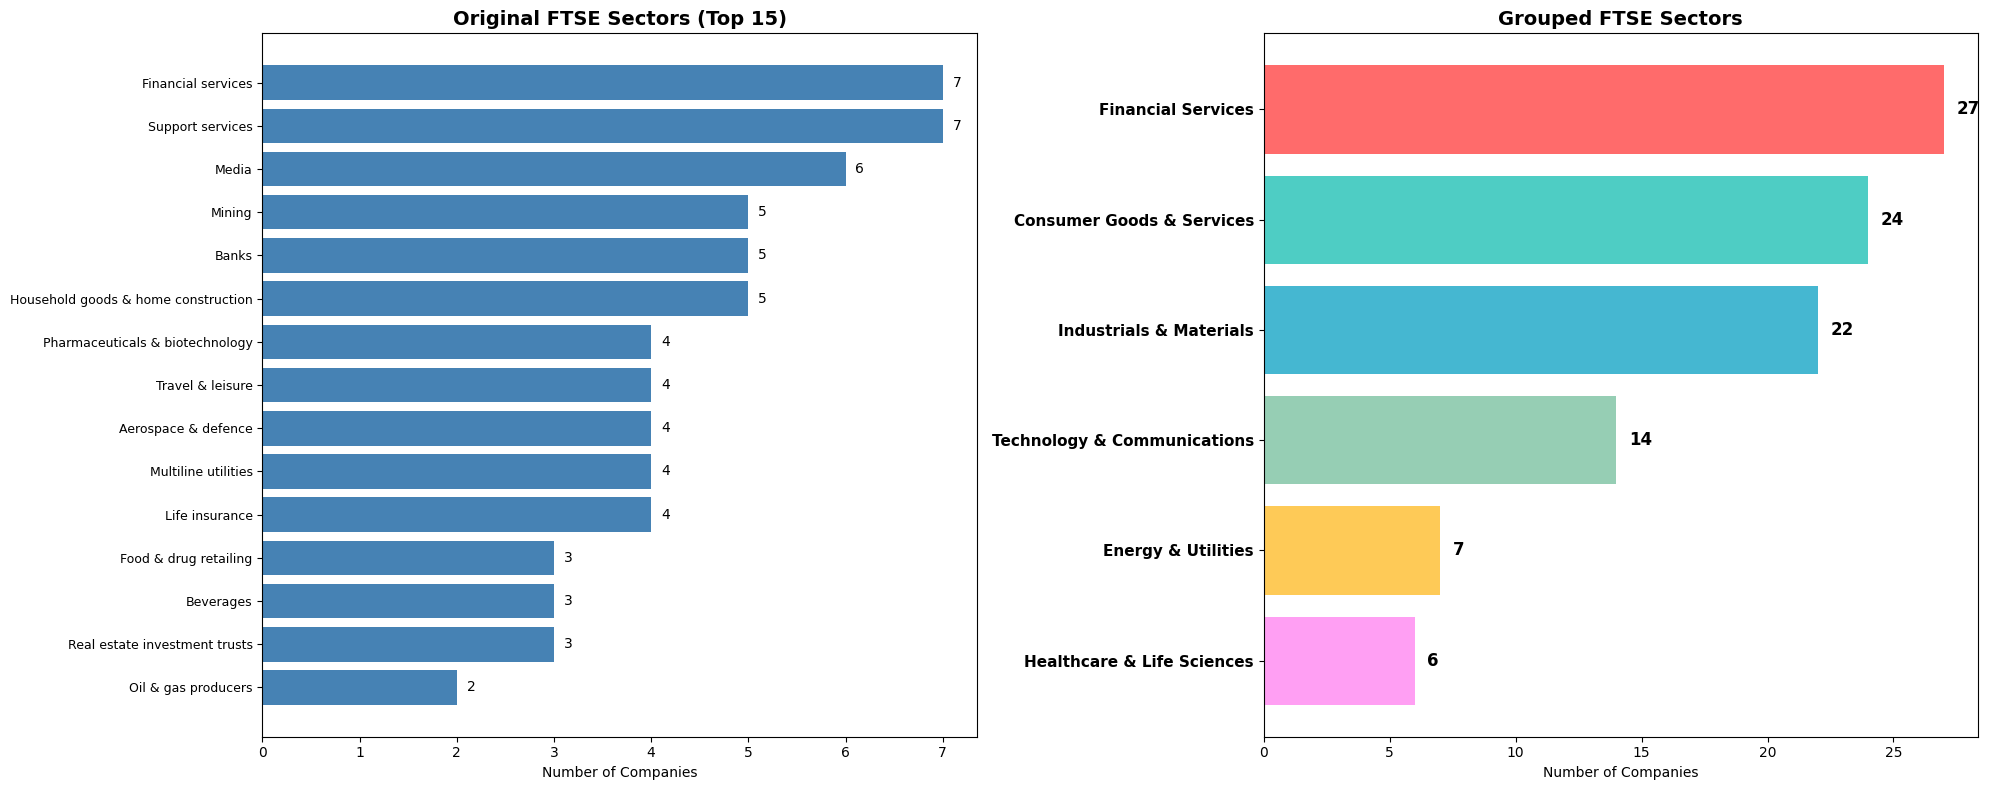


SECTOR GROUPING SUMMARY
Original sectors: 43
Grouped sectors: 6
Sector reduction: 37 sectors
Reduction percentage: 86.0%
Total companies: 100

Group Distribution:
  Financial Services: 27 companies (27.0%)
  Consumer Goods & Services: 24 companies (24.0%)
  Industrials & Materials: 22 companies (22.0%)
  Technology & Communications: 14 companies (14.0%)
  Energy & Utilities: 7 companies (7.0%)
  Healthcare & Life Sciences: 6 companies (6.0%)


In [40]:
# Create final visualization with corrected groupings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original sectors (top 15 for readability)
original_counts = labels.value_counts().head(15)
ax1.barh(range(len(original_counts)), original_counts.values, color='steelblue')
ax1.set_yticks(range(len(original_counts)))
ax1.set_yticklabels(original_counts.index, fontsize=9)
ax1.set_xlabel('Number of Companies')
ax1.set_title('Original FTSE Sectors (Top 15)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add count labels on bars
for i, v in enumerate(original_counts.values):
    ax1.text(v + 0.1, i, str(v), va='center', fontsize=10)

# Grouped sectors
group_counts_final = grouped_labels_corrected.value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']
ax2.barh(range(len(group_counts_final)), group_counts_final.values, color=colors[:len(group_counts_final)])
ax2.set_yticks(range(len(group_counts_final)))
ax2.set_yticklabels(group_counts_final.index, fontsize=11, fontweight='bold')
ax2.set_xlabel('Number of Companies')
ax2.set_title('Grouped FTSE Sectors', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

# Add count labels on bars
for i, v in enumerate(group_counts_final.values):
    ax2.text(v + 0.5, i, str(v), va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print final summary statistics
print(f"\n" + "="*60)
print(f"SECTOR GROUPING SUMMARY")
print(f"="*60)
print(f"Original sectors: {len(labels.unique())}")
print(f"Grouped sectors: {len(group_counts_final)}")
print(f"Sector reduction: {len(labels.unique()) - len(group_counts_final)} sectors")
print(f"Reduction percentage: {((len(labels.unique()) - len(group_counts_final)) / len(labels.unique()) * 100):.1f}%")
print(f"Total companies: {len(labels)}")

print(f"\nGroup Distribution:")
for group, count in group_counts_final.items():
    percentage = (count / len(labels)) * 100
    print(f"  {group}: {count} companies ({percentage:.1f}%)")

In [41]:
# Save the grouped labels
grouped_labels_corrected.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_sectors_grouped.csv', index=False)
print("Grouped labels saved to: /yunity/arusty/PF-GAP/data/ftse_100_sectors_grouped.csv")

# Create a comprehensive mapping reference DataFrame
mapping_df = pd.DataFrame([
    {'Original_Sector': original, 'Grouped_Sector': grouped, 'Count': labels.value_counts()[original]}
    for original, grouped in ftse_sector_to_group.items()
    if original in labels.values
]).sort_values(['Grouped_Sector', 'Count'], ascending=[True, False])

print("\nSector Mapping Reference:")
print("=" * 80)
current_group = None
for _, row in mapping_df.iterrows():
    if row['Grouped_Sector'] != current_group:
        current_group = row['Grouped_Sector']
        print(f"\n{current_group}:")
        print("-" * 40)
    print(f"  {row['Original_Sector']:<35} ({row['Count']} companies)")

# Save the mapping reference
mapping_df.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_sector_mapping.csv', index=False)
print(f"\nMapping reference saved to: /yunity/arusty/PF-GAP/data/ftse_100_sector_mapping.csv")

# Create a summary of the grouped labels for easy reference
print(f"\n" + "="*80)
print("FINAL GROUPED LABELS READY FOR USE")
print("="*80)
print("Variable: grouped_labels_corrected")
print("Type: pandas.Series")
print("Shape:", grouped_labels_corrected.shape)
print("Index matches the stock tickers in close_df")
print("Use this for your classification tasks!")

Grouped labels saved to: /yunity/arusty/PF-GAP/data/ftse_100_sectors_grouped.csv

Sector Mapping Reference:

Consumer Goods & Services:
----------------------------------------
  Household goods & home construction (5 companies)
  Travel & leisure                    (4 companies)
  Beverages                           (3 companies)
  Food & drug retailing               (3 companies)
  General retailers                   (2 companies)
  Tobacco                             (2 companies)
  Food & tobacco                      (1 companies)
  Leisure Goods                       (1 companies)
  Personal goods                      (1 companies)
  Retail hospitality                  (1 companies)
  Retailers                           (1 companies)

Energy & Utilities:
----------------------------------------
  Multiline utilities                 (4 companies)
  Oil & gas producers                 (2 companies)
  Electrical utilities & independent power producers (1 companies)

Financial Service

# Industry Convention Analysis

Let's analyze whether our sector groupings align with typical industry classification standards (GICS, ICB, etc.)